In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from hdf5storage import loadmat
import h5py
from scipy import signal
import _pickle as pkl

### Read Data

In [2]:
Data_dir = 'D:\Motion Data'
# dataset_file_name = os.path.join(Data_dir, 'MotionEEG_01_clean.mat')
# Motion_EEG = loadmat(dataset_file_name)

In [ ]:
Data_dir = r'D:\Motion Data'
mat_files_dir = os.path.join(Data_dir,'\mat_files')

In [6]:
Data_dir = r'D:\Motion Data'
mat_files_dir = os.path.join(Data_dir,'mat_files')
pkl_file_dir = os.path.join(Data_dir,'pkl_file')

Motion_data_file_name = os.path.join(pkl_file_dir, 'Motion_data.pkl')
if os.path.exists(Motion_data_file_name):
    with open(Motion_data_file_name, 'rb') as fp:
        Motion_data = pkl.load(fp)
else:
    Motion_data = {}

    
chanlocs_columns = ['labels', 'type', 'theta', 'radius', 'X', 'Y', 'Z', 'sph_theta', 'sph_phi', 'sph_radius', 'urchan', 'ref']
events_columns = ['latency', 'duration', 'channel', 'bvtime', 'bvmknum', 'type', 'code', 'urevent', 'epoch', 'motionCoherence',
                  'motionDirection', 'accuracy', 'confidence', 'RT', 'directionDetected']
# patients = os.listdir(mat_files_dir)
# for idx, patient in enumerate(patients):
#     if patient in Motion_data.keys():
#         print('Patient {} with name {} already exists!'.format(idx, patient))
#         continue
#     else:
patient = 'MotionEEG_01_clean'
Motion_data[patient] = {'chanlocs':{}, 'events':{}}
patient_mat_file = loadmat(os.path.join(mat_files_dir, patient))
for chanlocs_column in chanlocs_columns:
    Motion_data[patient]['chanlocs'][chanlocs_column] = patient_mat_file['chanlocs'][chanlocs_column]
for events_column in events_columns:
    Motion_data[patient]['events'][events_column] = patient_mat_file['events'][events_column]
Motion_data[patient]['times'] = patient_mat_file['times']
Motion_data[patient]['srate'] = patient_mat_file['srate']
Motion_data[patient]['eegdat'] = patient_mat_file['eegdat']

In [5]:
# from hdf5storage import loadmat
path = os.path.join(Data_dir, 'mat_files')
dataset_file_name = os.path.join(path, 'MotionEEG_01_clean.mat')
Motion_EEG = loadmat(dataset_file_name)

In [6]:
import pywt
import matplotlib.gridspec as gridspec

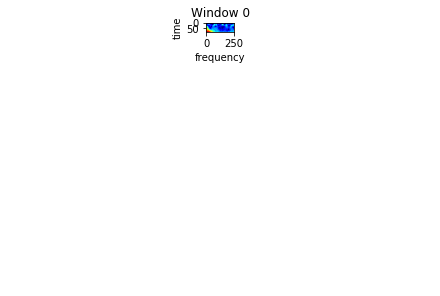

C:\Users\Lenovo\Anaconda3\envs\negin\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


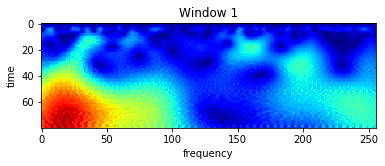

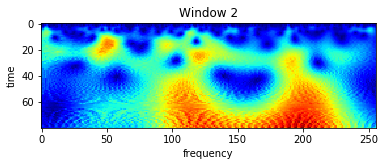

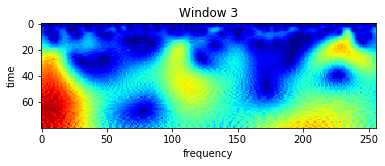

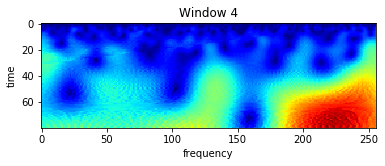

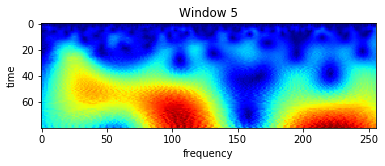

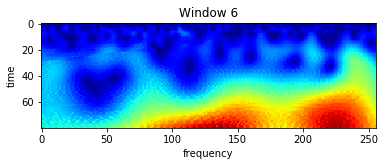

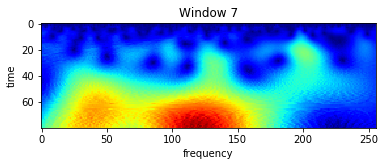

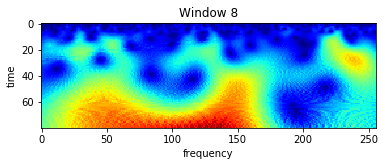

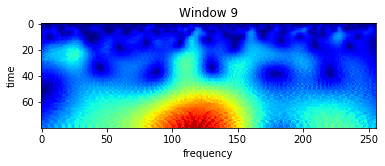

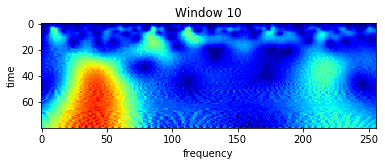

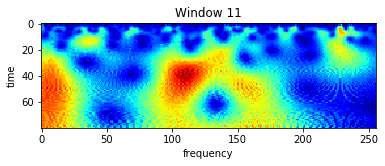

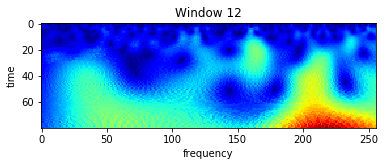

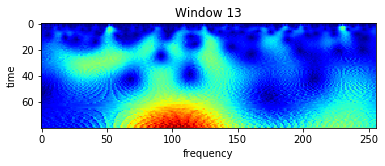

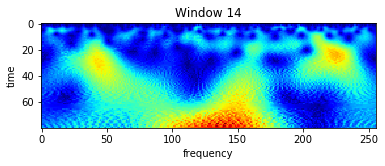

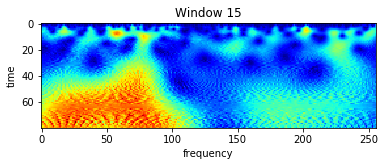

channel number 48


In [44]:

fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=1, nrows=16, figure=fig)


for i in range(1):
    event_eeg = Motion_EEG[i]
    for j in range(16):
        
        coef, freq = pywt.cwt(event_eeg[:, j*109:j*109+256],np.arange(1,81),'cmor0.4-1.0')
        morlet = np.moveaxis(abs(coef), 0, 1)
        f1 = fig.add_subplot(spec[j])
        channel = np.random.choice(63)
        plt.imshow(morlet[channel], cmap='jet')
        plt.title('Window {}'.format(j))
        plt.xlabel('frequency')
        plt.ylabel('time')
        plt.show()
print('channel number {}'.format(channel))